In [1]:
import pathlib

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import notebook
import os

import pandas as pd
import cv2

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

from dataset import DetectionDataset
from dataset.plates_module import filter_marks
from utils import draw_bbox, load_json, extract_plates

In [3]:
data_dir = pathlib.Path("data", "converted")

In [4]:
marks = load_json(os.path.join(data_dir, "train.json"))

In [27]:
dataset = DetectionDataset(marks, str(data_dir), 900)

In [28]:
len(marks)

25632

In [29]:
len(filter_marks(marks))

Images with incorrect aspect ratio:  5


25627

train\5600.bmp


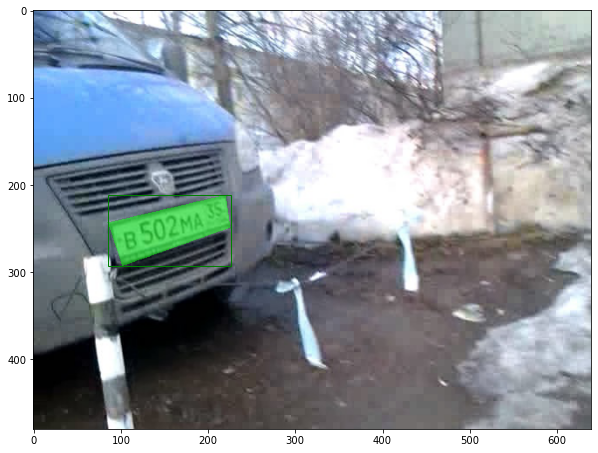

In [36]:
index = 5600
img, info = dataset[index]
print(marks[index]["file"])
right_img = img.permute(1, 2, 0).numpy()
fig = draw_bbox(right_img, info["boxes"])

plates = extract_plates(right_img, info["boxes"], info["masks"].numpy())

for mask in info["masks"]:
    ax = fig.axes[0]
    mask = np.dstack((mask, mask, mask, mask))
    mask[..., 1] *= 255
    mask[..., -1] *= 255
    mask[..., [0, 2]] = 0
    ax.imshow(mask, alpha=0.5)

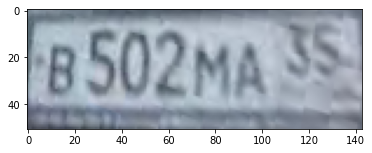

In [37]:
for plate in plates:
    plt.imshow(plate)
    plt.show()

In [34]:
# bbox_areas = []

# for i, item in notebook.tqdm(enumerate(marks), total=len(marks)):
#     boxes = item["nums"]
#     try:
#         with Image.open(data_dir / item["file"]) as img:
#             width = img.width
#             height=  img.height
        
#         for box in boxes:
#             points = np.round(np.array(box['box'])).astype(np.int32)
#             x0, y0 = np.min(points[:, 0]), np.min(points[:, 1])
#             x2, y2 = np.max(points[:, 0]), np.max(points[:, 1])
#             bbox_width = x2 - x0
#             bbox_height = y2 - y0
#             bbox_areas.append({"file": item["file"], "data_index": i, "area_ratio": bbox_height * bbox_width / (height * width), "aspect_ratio": bbox_width / bbox_height})
#     except:
#         print("Skip" , item["file"])

In [13]:
# bbox_info = pd.DataFrame.from_records(bbox_areas)

In [14]:
# bbox_info.head()

In [15]:
# bbox_info["aspect_ratio"].hist()

In [16]:
# bbox_info[bbox_info["aspect_ratio"] <= 0.8]

In [17]:
# bbox_info["area_ratio"].hist(bins=30)

In [18]:
# bbox_info[bbox_info["area_ratio"] < 0.0025]

In [19]:
from collections import Counter

In [20]:
counter = Counter()

In [23]:
for plates in marks:
    for bbox in plates["nums"]:
        counter.update(bbox["text"])

In [24]:
counter

Counter({'B': 16886,
         '0': 26540,
         '6': 24088,
         '1': 30690,
         '2': 22890,
         '5': 39290,
         'M': 11898,
         '9': 29336,
         '3': 34432,
         '8': 19536,
         'O': 11972,
         'X': 11884,
         'H': 10636,
         'A': 15130,
         '4': 23972,
         'T': 14014,
         '7': 28894,
         'P': 11502,
         'Y': 11928,
         'C': 11946,
         'K': 11900,
         'E': 12656,
         'В': 772,
         'Е': 676,
         'С': 706,
         'Х': 732,
         'А': 1082,
         'К': 670,
         'М': 714,
         'o': 6,
         'p': 6,
         'Н': 768,
         'О': 822,
         'Р': 680,
         'Т': 702,
         'в': 10,
         'к': 6,
         'т': 4,
         'e': 8,
         'k': 4,
         'c': 6,
         'x': 2,
         'a': 4,
         'm': 6,
         'h': 2,
         'х': 8,
         'е': 8,
         'у': 8,
         'с': 2,
         'р': 4,
         'У': 8,
         'м': 2,
    